# Bibliotecas Usadas

In [ ]:
# Dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modelos
from sklearn.preprocessing import LabelEncoder # Lida com dados CATEGÓRICOS.

# Analisando DataSet:

## Descrição do DataSet:

* PassengerID - ID
* Survived - Survival (0 = No; 1 = Yes)
* Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* Name - Name
* Sex - Sex
* Age - Age
* SibSp - Number of Siblings/Spouses Aboard
* ParCh - Number of Parents/Children Aboard
* Ticket - Ticket Number
* Fare - Passenger Fare
* Cabin - Cabin
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
df_titanic = pd.read_csv('titanic.csv')

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_titanic.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [ ]:
# O que aparece em cada uma dessas Features:

print('Pais e Filhos:', df_titanic['Parch'].unique())
print('Irmãos e Conjuges:', df_titanic['SibSp'].unique())
print('Local de Embarque:', df_titanic['Embarked'].unique())

Pais e Filhos: [0 1 2 5 3 4 6]
Irmãos e Conjuges: [1 0 3 4 2 5 8]
Local de Embarque: ['S' 'C' 'Q' nan]


## Verificando NaNs:

<Axes: >

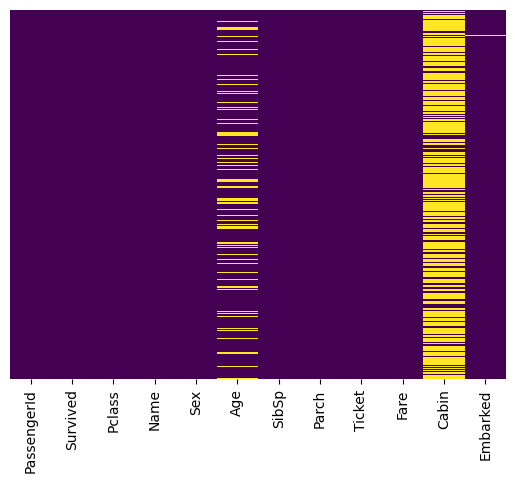

In [ ]:
sns.heatmap(df_titanic.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Sobreviventes:

In [ ]:
sobreviv = df_titanic[df_titanic['Survived'] == 1]
nao_sobreviv = df_titanic[df_titanic['Survived'] == 0]

porc_surv = len(sobreviv)/len(df_titanic) * 100
porc_nonsurv = len(nao_sobreviv)/len(df_titanic) * 100

print(f'Total = {len(df_titanic)}')
print(f'Sobreviventes = {len(sobreviv)}, cerca de {porc_surv:.0f}%')
print(f'Não Sobreviventes = {len(nao_sobreviv)}, cerca de {porc_nonsurv:.0f}%')

Total = 891
Sobreviventes = 342, cerca de 38%
Não Sobreviventes = 549, cerca de 62%


## Classes Sociais:

In [ ]:
df_titanic.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

## Locais de Embarque:

In [ ]:
df_titanic.groupby('Embarked').size()

Embarked
C    168
Q     77
S    644
dtype: int64

## Analisando Relações entre Features:

In [ ]:
feat = [df_titanic['Survived'], df_titanic['Pclass']]

print(pd.crosstab(df_titanic['Pclass'], df_titanic['Sex']))
print("\n", pd.crosstab(df_titanic['Pclass'], df_titanic['Survived']))
print("\n", pd.crosstab(feat, df_titanic['Sex']))

Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347

 Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119

 Sex              female  male
Survived Pclass              
0        1            3    77
         2            6    91
         3           72   300
1        1           91    45
         2           70    17
         3           72    47


In [ ]:
bebes = df_titanic[(df_titanic['Age'] < 1) & (df_titanic['Survived'] == 1)]
len(bebes)

7

In [ ]:
idosos = df_titanic[(df_titanic['Age'] > 60) & (df_titanic['Survived'] == 1)]
len(idosos)

5

# Consertando Dados Faltantes (Idade)

In [ ]:
fig = px.box(df_titanic, x='Pclass', y='Age',
             color='Pclass',
             title='Boxplot de Idades pela Classe Social')

fig.show()

In [ ]:
# Utilizando a "Média" (Mediana) encontrada no Boxplot para entrada de dados:

def reentrada_idade(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    elif Pclass == 3:
      return 24
  else:
    return Age

df_titanic['Age'] = df_titanic[['Age', 'Pclass']].apply(reentrada_idade, axis=1)

In [ ]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

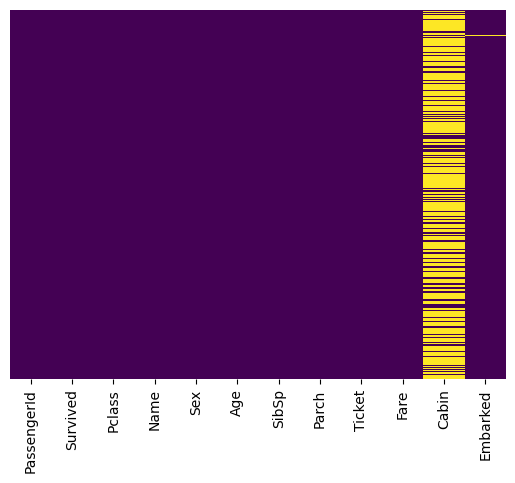

In [ ]:
sns.heatmap(df_titanic.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

## Retirando Features com Falta de Dados:

In [ ]:
df_titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_titanic.dropna(inplace=True)

In [ ]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

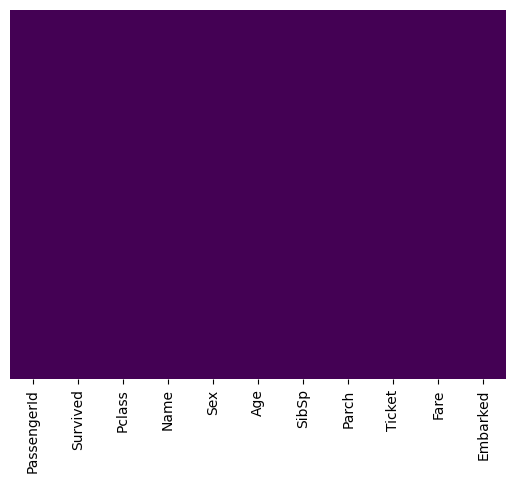

In [ ]:
sns.heatmap(df_titanic.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

# Análise Gráfica dos Dados:

In [ ]:
quant = df_titanic.groupby(['Sex', 'Survived']).size().unstack()

porcen_sobre = quant.div(quant.sum(axis=1), axis=0)*100
porcen_sobre.round(2)

Survived,0,1
Sex,,
female,25.96,74.04
male,81.11,18.89


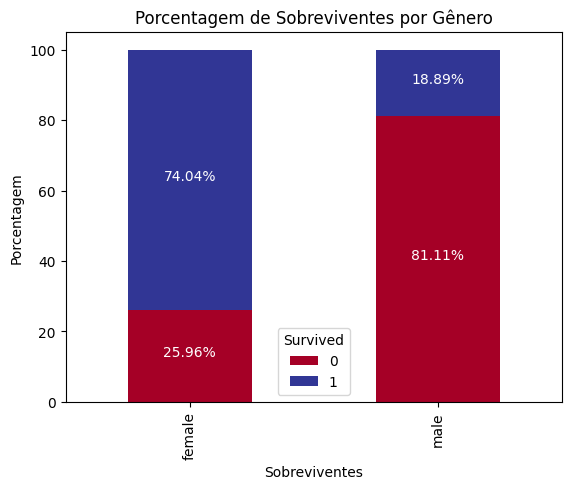

In [ ]:
ax = porcen_sobre.plot(kind='bar', stacked=True, colormap='RdYlBu')
plt.xlabel('Sobreviventes')
plt.ylabel('Porcentagem')
plt.title('Porcentagem de Sobreviventes por Gênero')

# Colocando Porcentagem no Gráfico:

for i in range(len(porcen_sobre)):
  femi_por = porcen_sobre.iloc[i,0]
  masc_por = porcen_sobre.iloc[i,1]
  ax.text(i, femi_por/2, f'{femi_por:.2f}%',
          ha='center', color='white')
  ax.text(i, femi_por + (masc_por/2), f'{masc_por:.2f}%',
          ha='center', color='white')

([<matplotlib.axis.XTick at 0x781bf7432fb0>,
 [Text(0, 0, 'Não Sobreviventes'), Text(1, 0, 'Sobreviventes')])

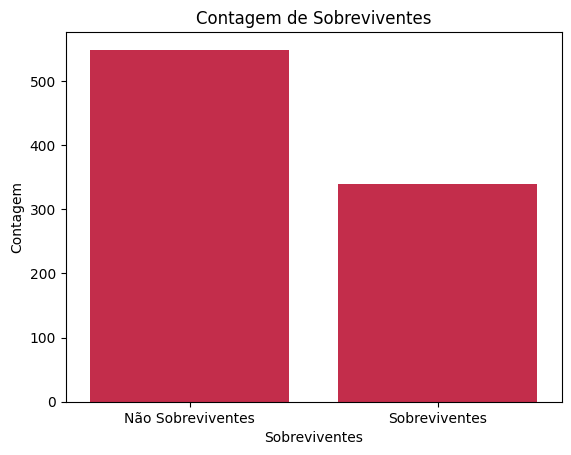

In [ ]:
sns.countplot(x='Survived', data=df_titanic, color='crimson')
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.title('Contagem de Sobreviventes')
plt.xticks([0,1], ['Não Sobreviventes', 'Sobreviventes'])

([<matplotlib.axis.XTick at 0x781bf74aca30>,
 [Text(0, 0, 'Não Sobreviventes'), Text(1, 0, 'Sobreviventes')])

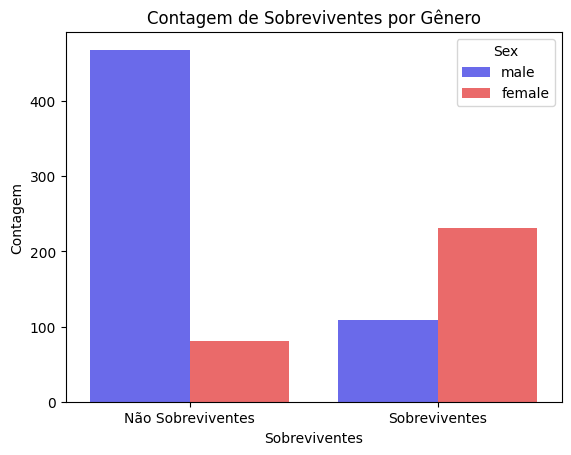

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df_titanic, palette='seismic')
plt.xlabel('Sobreviventes')
plt.ylabel('Contagem')
plt.title('Contagem de Sobreviventes por Gênero')
plt.xticks([0,1], ['Não Sobreviventes', 'Sobreviventes'])

# Analisando Dados Categóricos:

In [ ]:
def rotulos_codificados(df_cod, colunas_decodificadas):
  df_descod = df_titanic.copy()
  cod = LabelEncoder()

  for coluna in colunas_decodificadas:
    if coluna in df_descod.columns:
      df_descod[coluna] = cod.fit_transform(df_descod[coluna])    #transforma o dado categórico em numérico.
    else:
      print('\n As colunas solicitadas não foram encontradas no DataFrame.')
  return df_descod

colunas_codificar = ['Embarked', 'Sex']
df_descod = rotulos_codificados(df_titanic, colunas_codificar)
df_descod

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,24.0,1,2,W./C. 6607,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0


In [ ]:
print("Antes da Codificação: ",df_titanic['Embarked'].unique())
print("Depois da Codificação: ",df_descod['Embarked'].unique())
print("\nAntes da Codificação: ",df_titanic['Sex'].unique())
print("Depois da Codificação: ",df_descod['Sex'].unique())

Antes da Codificação:  ['S' 'C' 'Q']
Depois da Codificação:  [2 0 1]

Antes da Codificação:  ['male' 'female']
Depois da Codificação:  [1 0]
